Band

Directories ensured: 
./BaZrS3/band_hse06/
./BaZrS3/band_hse06/../optical/
./BaZrS3/band_hse06/../../curve/BaZrS3


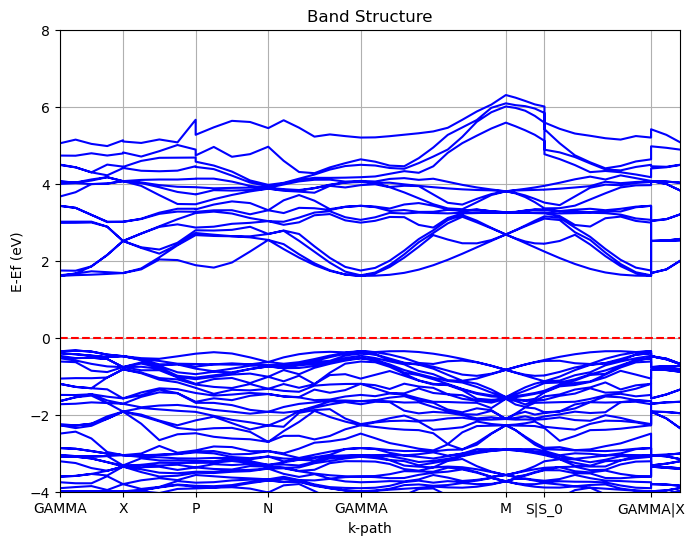

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the compound name
compound_name = 'BaZrS3'


# Define the directory paths
dir_path = f'./{compound_name}/band_hse06/'  # Path for BAND.dat and KLABELS
dir_path_opt = os.path.join(dir_path, '../optical/')
dir_path_out = os.path.join(dir_path, f'../../curve/{compound_name}')

# Create the directories if they don't exist
os.makedirs(dir_path, exist_ok=True)
os.makedirs(dir_path_opt, exist_ok=True)
os.makedirs(dir_path_out, exist_ok=True)

print(f"Directories ensured: \n{dir_path}\n{dir_path_opt}\n{dir_path_out}")


# Combine the directory path with the filename for BAND.dat
band_file_path = os.path.join(dir_path, 'BAND.dat')

# Load the band structure data from the specified file path
data = np.loadtxt(band_file_path)

# Extract k-point positions and corresponding energies
k_points = data[:, 0]
energies = data[:, 1]

# Combine the directory path with the filename for KLABELS
klabels_file_path = os.path.join(dir_path, 'KLABELS')

# Load the KLABELS file, skipping any header or non-numeric rows
labels_data = []
with open(klabels_file_path, 'r') as file:
    for line in file:
        # Skip comment lines or lines that don't contain k-point data
        if not line.startswith("#") and len(line.split()) == 2:
            try:
                label, position = line.split()
                position = float(position)
                labels_data.append((label, position))
            except ValueError:
                continue  # Skip lines that don't have valid data

# Convert to numpy array for easy indexing
labels_data = np.array(labels_data, dtype=object)

# Extract k-point labels and corresponding k-point positions
k_labels = labels_data[:, 0]
k_positions = labels_data[:, 1].astype(float)

# Plot the band structure
plt.figure(figsize=(8, 6))
plt.plot(k_points, energies, color='b')

# Customize the plot
plt.title('Band Structure')
plt.xlabel('k-path')
plt.ylabel('E-Ef (eV)')
plt.grid(True)

# Mark the high-symmetry points on the plot
# Use the k_positions to place the labels at the correct k-point positions
xticks = []
xticklabels = []
for i, label in enumerate(k_labels):
    # Find the nearest k-point in the band structure to the label position
    idx = (np.abs(k_points - k_positions[i])).argmin()
    xticks.append(k_points[idx])
    xticklabels.append(label)

# Set the x-ticks to the k-point positions and label them with k-path names
plt.xticks(xticks, xticklabels)

# Manually set the x and y axis range
# Example: Set the x-range to 0 to 3.5 and y-range to -51 to -49
plt.xlim(0, 3)  # Set x-axis range
plt.ylim(-4, 8)  # Set y-axis range

# Add a dotted line at 0 eV (Fermi level)
plt.axhline(y=0, color='r', linestyle='--', label='Fermi Level')

# Show the plot and save it as an image
plt.savefig(os.path.join(dir_path_out, 'band_structure.png'), dpi=300)
plt.show()


TDOS

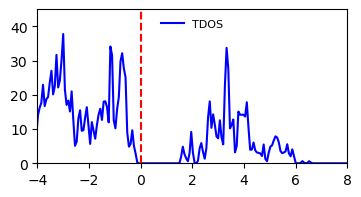

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the directory path where DOSCAR or the DOS file is located
#dir_path = './BaZrO3/band_hse06/'  # Change this to your desired directory

# Combine the directory path with the filename for DOSCAR or your custom DOS file
dos_file_path = os.path.join(dir_path, 'TDOS.dat')  # Or use your custom DOS file name

# Load the DOS data from the specified file path
# For DOSCAR, skip the first 6 lines (header) and load the energy and DOS values
data = np.loadtxt(dos_file_path, skiprows=0)

# Extract the energy levels and corresponding DOS values
# Assuming the data has columns: [Energy, DOS, ...]
energy = data[:, 0]
dos = data[:, 1]

# Plot the DOS structure
plt.figure(figsize=(4, 2))
plt.plot(energy, dos, color='b',label= 'TDOS',linewidth=1.5)

# Customize the plot
#plt.title('Density of States (DOS)')
#plt.xlabel('Energy (eV)')
#plt.ylabel('TDOS (states/eV)')
#plt.grid(True)

# Add a vertical line at the Fermi level (assuming it's at 0 eV)
plt.axvline(x=0, color='r', linestyle='--')
# Set the x and y axis range manually
# Example: Set the x-range to -5 to 5 eV and y-range to 0 to 15 states/eV
plt.xlim(-4, 8)  # Set x-axis range (Energy range in eV)
plt.ylim(0, 45)  # Set y-axis range (DOS range)

# Show the plot and save it as an image
plt.legend(fontsize=8, loc='upper center', frameon=False)
plt.savefig(os.path.join(dir_path, '1_dos_structure.png'), dpi=300)
plt.show()


PDOS

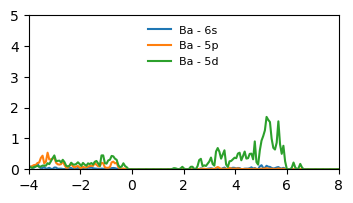

Saved ./BaZrS3/band_hse06/2_pdos_Ba.png


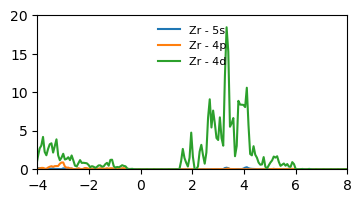

Saved ./BaZrS3/band_hse06/3_pdos_Zr.png


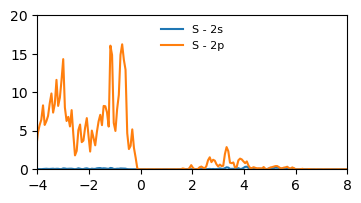

Saved ./BaZrS3/band_hse06/4_pdos_S.png


In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the directory path where the PDOS data is located
#dir_path = './BaZrO3/band_hse06/'  # Change this to your desired directory
file_name = 'PDOS_USER.dat'  # Replace with your PDOS file name
file_path = os.path.join(dir_path, file_name)

# Load the PDOS data
# Assuming the file format: Energy | Element1_orbital1 | Element1_orbital2 | ... | Total DOS
data = np.loadtxt(file_path)

# Extract energy and PDOS contributions
energy = data[:, 0]
pdos_columns = data[:, 1:]  # Exclude the energy column

# Define elements and their corresponding orbitals
elements_and_orbitals = {
    
    'Ba': ['6s', '5p', '5d'],
    'Zr': ['5s', '4p', '4d'],
    #'O': ['2s', '2p'],
    'S': ['2s', '2p'],
    # Add more elements and their orbitals as needed
}

# Define y-axis limits for each element
element_y_limits = {
    
    'Ba': (0, 5),  # y-limit for Ba
    'Zr': (0, 20),  # y-limit for Zr
    #'O': (0, 30),  # y-limit for O
    'S': (0,20),
    # Add y-limits for additional elements as needed
}

# Validate that the total number of columns matches the expected structure
total_columns = sum(len(orbitals) for orbitals in elements_and_orbitals.values())
assert pdos_columns.shape[1] == total_columns, "Mismatch in PDOS columns and defined structure."

# Initialize the column index
col_idx = 0
file_counter = 2  # Start numbering from 1

# Plot PDOS for each element with orbital contributions in the same plot
for element, orbitals in elements_and_orbitals.items():
    plt.figure(figsize=(4, 2))

    # Loop over the orbitals for the current element
    for orbital in orbitals:
        # Extract the corresponding PDOS column
        pdos = pdos_columns[:, col_idx]
        col_idx += 1  # Move to the next column for the next orbital

        # Plot with a unique color and style
        plt.plot(energy, pdos, label=f'{element} - {orbital}', linestyle='-', linewidth=1.5)

    # Customize the plot for this element
    #plt.title(f'PDOS for {element}', fontsize=12)
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Dotted line at zero energy
    plt.legend(fontsize=8, loc='upper center', frameon=False)  # Modify the legend with element and orbital name

    # Manually set x and y axis range for this element
    plt.xlim(-4, 8)  # Adjust x-axis range as needed
    y_min, y_max = element_y_limits.get(element, (0, 10))  # Default y-limit if not specified
    plt.ylim(y_min, y_max)

    
    # Save the plot with a sequential file name and element name (e.g., '1_pdos_Ba.png')
    output_file = os.path.join(dir_path, f'{file_counter}_pdos_{element}.png')
    plt.savefig(output_file, dpi=300)
    plt.show()

    print(f"Saved {output_file}")
    file_counter += 1  # Increment the file sequence counter


Merge DOS

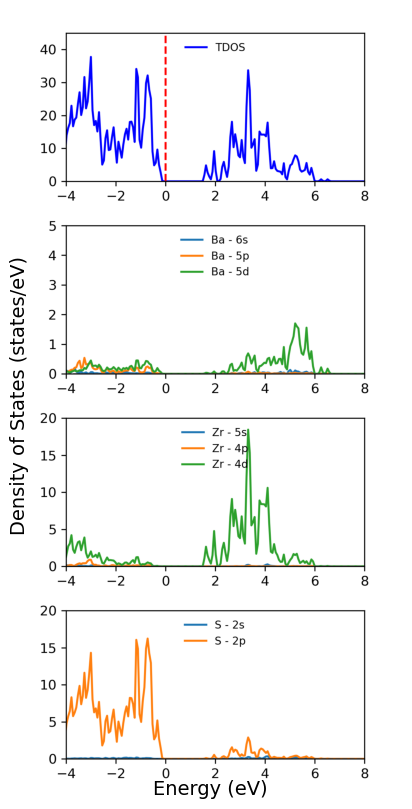

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Directory containing the PDOS images
#dir_path = './BaZrO3/band_hse06/'  # Change this to your desired directory

# Remove any existing combined_pdos.png file
combined_pdos_path = os.path.join(dir_path, 'combined_pdos.png')
if os.path.exists(combined_pdos_path):
    os.remove(combined_pdos_path)
    print(f"Removed existing {combined_pdos_path}")

# Gather all PDOS images in the directory
pdos_images = [f for f in os.listdir(dir_path) if 'dos' in f and f.endswith('.png')]

# Sort the images to maintain order (optional)
pdos_images.sort()

# Load images
images = [Image.open(os.path.join(dir_path, img)) for img in pdos_images]

# Calculate the combined image dimensions
total_width = max(img.size[0] for img in images)
total_height = sum(img.size[1] for img in images)

# Create a blank canvas for the combined image
combined_image = Image.new('RGB', (total_width, total_height))

# Paste each image into the combined image
y_offset = 0
for img in images:
    combined_image.paste(img, (0, y_offset))
    y_offset += img.size[1]

# Save the combined image temporarily
combined_path = os.path.join(dir_path, 'combined_pdos_temp.png')
combined_image.save(combined_path)

# Add x and y labels to the combined image using Matplotlib
fig, ax = plt.subplots(figsize=(8, 10))
img = plt.imread(combined_path)
ax.imshow(img)
ax.axis('off')  # Turn off the ticks and frame

# Add labels
plt.text(
    0.5, -0.02, 'Energy (eV)', fontsize=14, ha='center', transform=ax.transAxes
)  # X-label
plt.text(
    -0.02, 0.5, 'Density of States (states/eV)', fontsize=14, va='center', rotation='vertical', transform=ax.transAxes
)  # Y-label

# Save the final combined image with labels
final_combined_path = os.path.join(dir_path_out, 'combined_pdos.png')
plt.savefig(final_combined_path, dpi=300, bbox_inches='tight')
plt.show()

# Clean up temporary file
os.remove(combined_path)


Optical

Removed existing ./BaZrS3/band_hse06/../../curve/BaZrS3/optical_curves.png


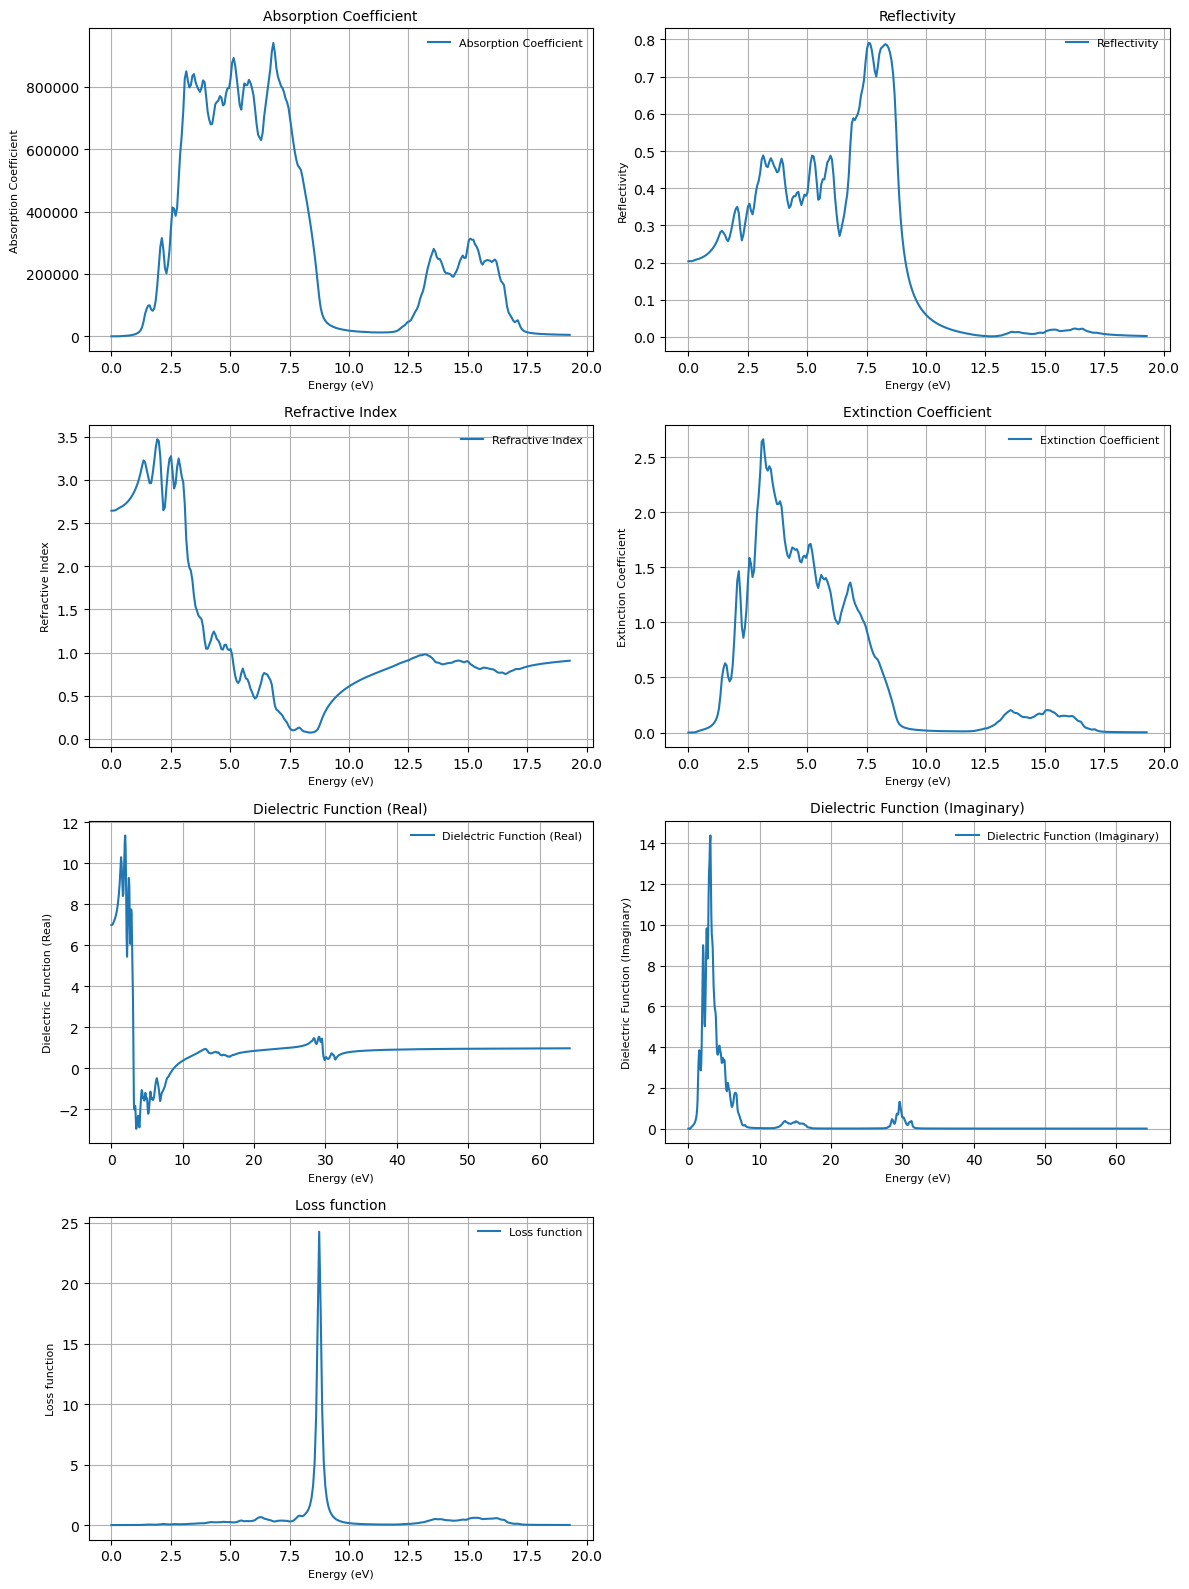

Optical curves saved to ./BaZrS3/band_hse06/../../curve/BaZrS3/optical_curves.png


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the directory path where optical data files are located

output_file = os.path.join(dir_path_out, 'optical_curves.png')

# Remove existing output file if it exists
if os.path.exists(output_file):
    os.remove(output_file)
    print(f"Removed existing {output_file}")

# Define file names for the 7 optical properties
optical_files = [
    'ABSORPTION.dat',
    'REFLECTIVITY.dat',
    'REFRACTIVE.dat',
    'EXTINCTION.dat',
    'REAL.in',
    'IMAG.in',
    'ENERGY_LOSS_SPECTRUM.dat',
]

# Property names corresponding to each file
property_names = [
    'Absorption Coefficient',
    'Reflectivity',
    'Refractive Index',
    'Extinction Coefficient',
    'Dielectric Function (Real)',
    'Dielectric Function (Imaginary)',
    'Loss function',
]

# Check if all files exist
for file in optical_files:
    file_path = os.path.join(dir_path_opt, file)
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

# Initialize plot
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # 4 rows, 2 columns
axes = axes.flatten()

# Plot each optical property
for idx, (file_name, property_name) in enumerate(zip(optical_files, property_names)):
    file_path = os.path.join(dir_path_opt, file_name)
    data = np.loadtxt(file_path)

    # Extract x (e.g., energy in eV or wavelength in nm) and y (property values)
    x = data[:, 0]
    y = data[:, 1]

    # Plot on the respective subplot
    axes[idx].plot(x, y, label=property_name, linewidth=1.5)
    axes[idx].set_title(property_name, fontsize=10)
    axes[idx].set_xlabel('Energy (eV)', fontsize=8)  # Change to 'Wavelength (nm)' if applicable
    axes[idx].set_ylabel(property_name, fontsize=8)
    axes[idx].grid(True)
    axes[idx].legend(fontsize=8, loc='upper right', frameon=False)

# Remove unused subplot if fewer than 8 properties
for idx in range(len(property_names), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and save the combined plot
plt.tight_layout()
plt.savefig(output_file, dpi=300)
plt.show()

print(f"Optical curves saved to {output_file}")


All compounds Optical

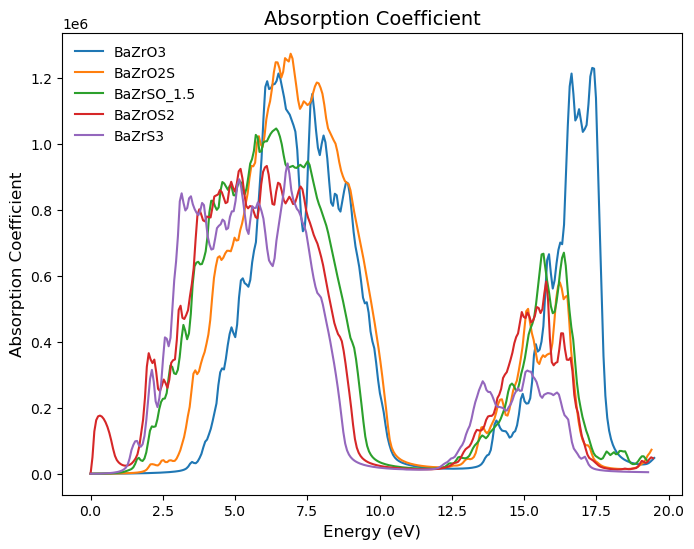

Saved plot for Absorption Coefficient to ./curve/absorption_coefficient.png


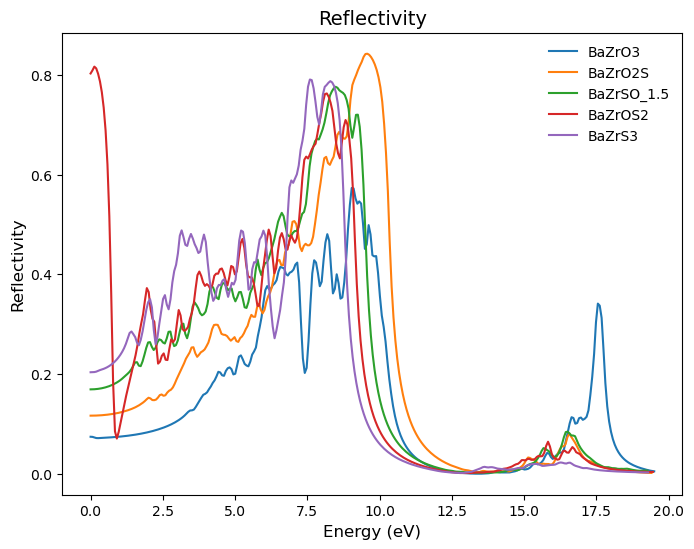

Saved plot for Reflectivity to ./curve/reflectivity.png


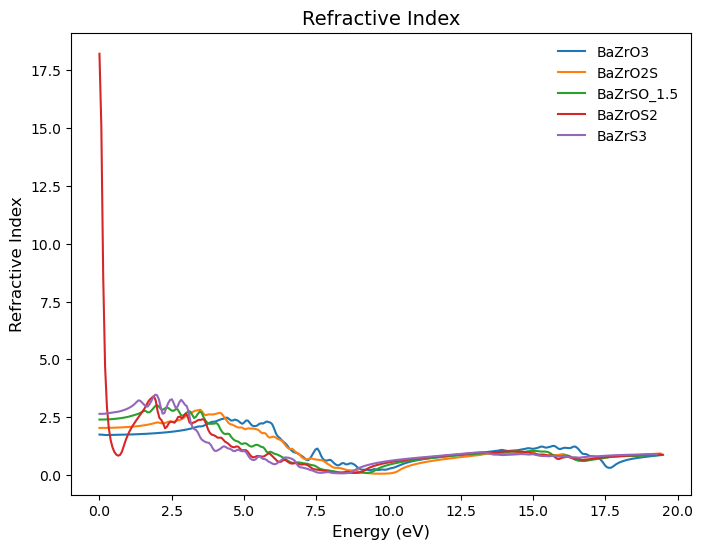

Saved plot for Refractive Index to ./curve/refractive_index.png


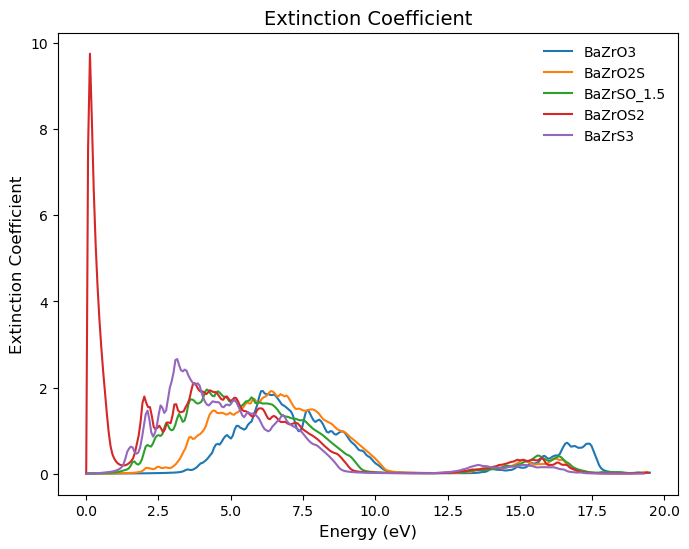

Saved plot for Extinction Coefficient to ./curve/extinction_coefficient.png


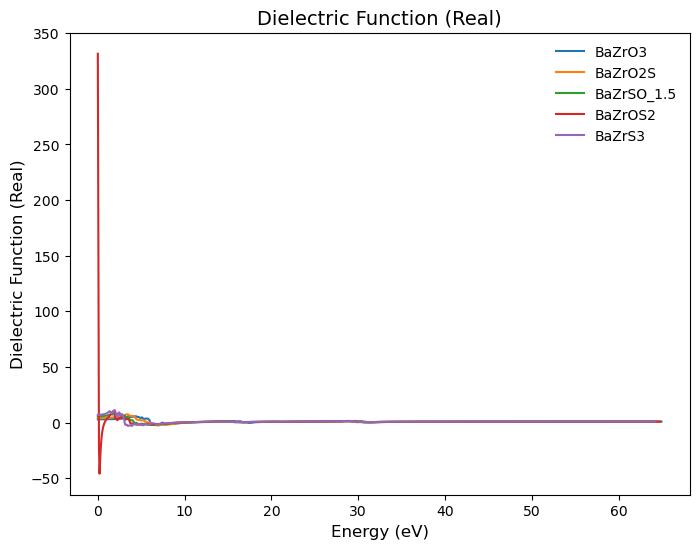

Saved plot for Dielectric Function (Real) to ./curve/dielectric_function_(real).png


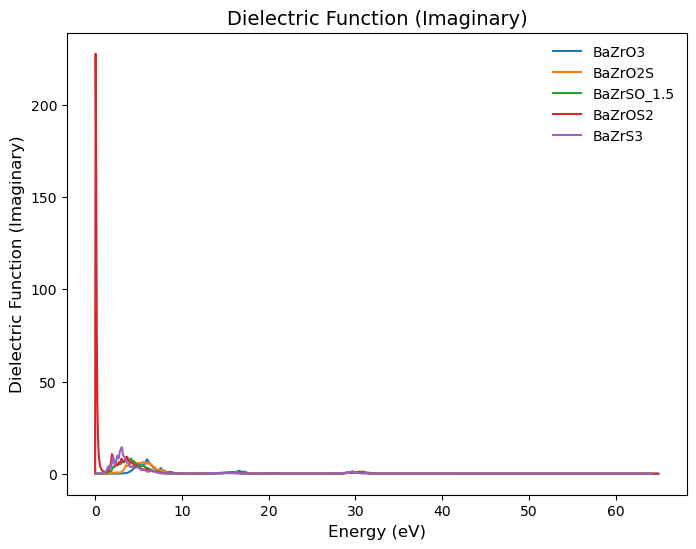

Saved plot for Dielectric Function (Imaginary) to ./curve/dielectric_function_(imaginary).png


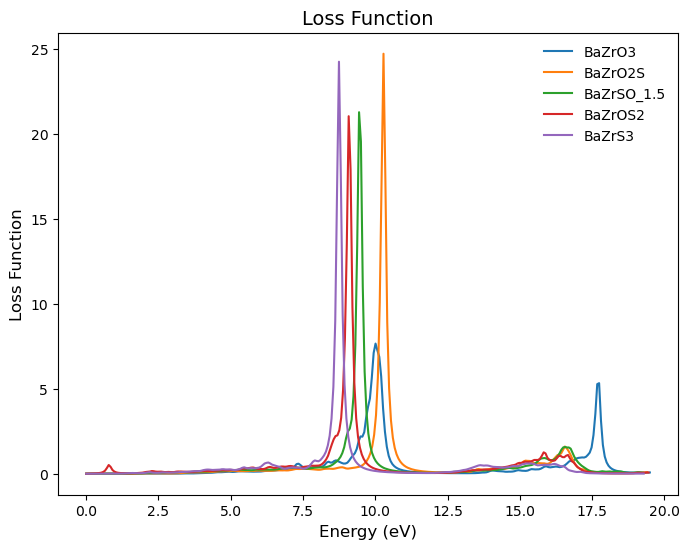

Saved plot for Loss Function to ./curve/loss_function.png
All optical curves plotted and saved.


In [23]:
''
import os
import numpy as np
import matplotlib.pyplot as plt

# Define compounds and directory paths
compounds = ['BaZrO3', 'BaZrO2S', 'BaZrSO_1.5', 'BaZrOS2', 'BaZrS3']  # Replace with actual names
base_dir = './'  # Base directory for all compounds
optical_subdir = 'optical/'  # Subdirectory for optical data

# Define file names for the 7 optical properties
optical_files = [
    'ABSORPTION.dat',
    'REFLECTIVITY.dat',
    'REFRACTIVE.dat',
    'EXTINCTION.dat',
    'REAL.in',
    'IMAG.in',
    'ENERGY_LOSS_SPECTRUM.dat',
]

# Property names corresponding to each file
property_names = [
    'Absorption Coefficient',
    'Reflectivity',
    'Refractive Index',
    'Extinction Coefficient',
    'Dielectric Function (Real)',
    'Dielectric Function (Imaginary)',
    'Loss Function',
]

# Initialize plot directory
output_dir = './curve/'
os.makedirs(output_dir, exist_ok=True)

# Loop over optical properties and plot data for all compounds
for file_name, property_name in zip(optical_files, property_names):
    plt.figure(figsize=(8, 6))

    for compound in compounds:
        dir_path_opt = os.path.join(base_dir, compound, optical_subdir)
        file_path = os.path.join(dir_path_opt, file_name)

        # Check if file exists
        if not os.path.exists(file_path):
            print(f"Warning: {file_path} not found.")
            continue

        # Load data
        data = np.loadtxt(file_path)
        x = data[:, 0]  # Energy (eV) or Wavelength (nm)
        y = data[:, 1]  # Optical property value

        # Plot data for this compound
        plt.plot(x, y, label=compound, linewidth=1.5)

    # Customize the plot
    plt.title(property_name, fontsize=14)
    plt.xlabel('Energy (eV)', fontsize=12)  # Change to 'Wavelength (nm)' if applicable
    plt.ylabel(property_name, fontsize=12)
    #plt.grid(True)
    plt.legend(fontsize=10, loc='best', frameon=False)

    # Save the plot
    output_file = os.path.join(output_dir, f"{property_name.replace(' ', '_').lower()}.png")
    plt.savefig(output_file, dpi=300)
    plt.show()

    print(f"Saved plot for {property_name} to {output_file}")

print("All optical curves plotted and saved.")


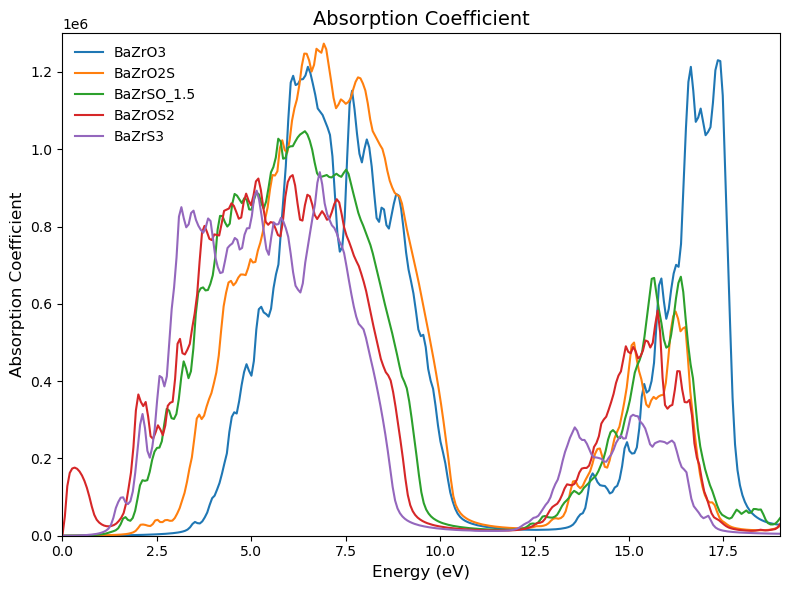

Saved plot for Absorption Coefficient to ./curve/absorption_coefficient.png


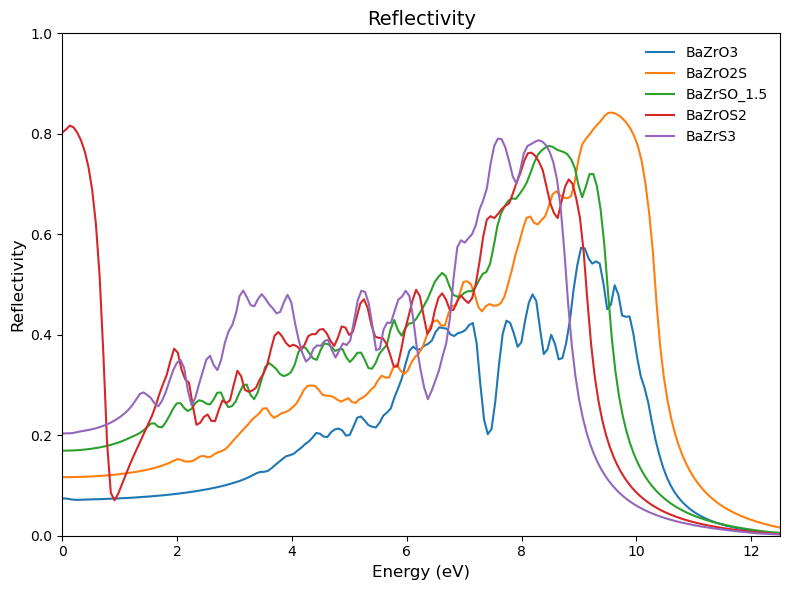

Saved plot for Reflectivity to ./curve/reflectivity.png


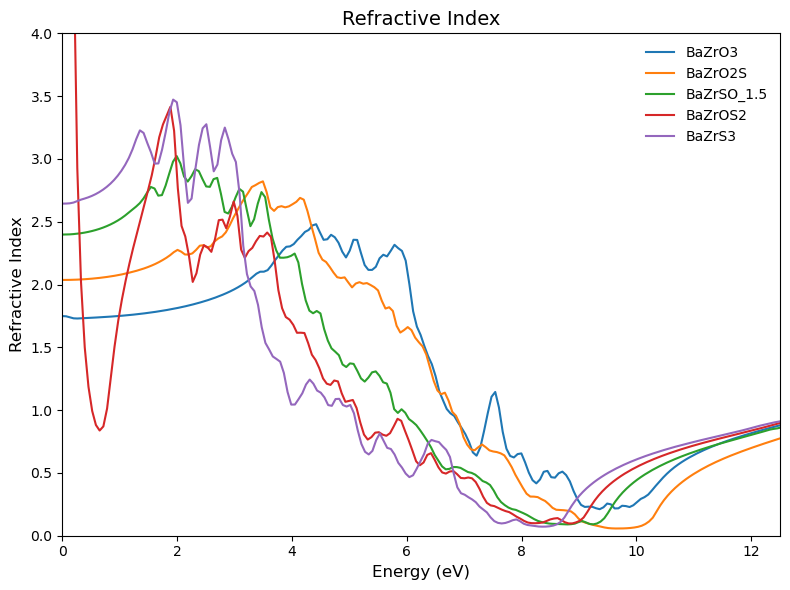

Saved plot for Refractive Index to ./curve/refractive_index.png


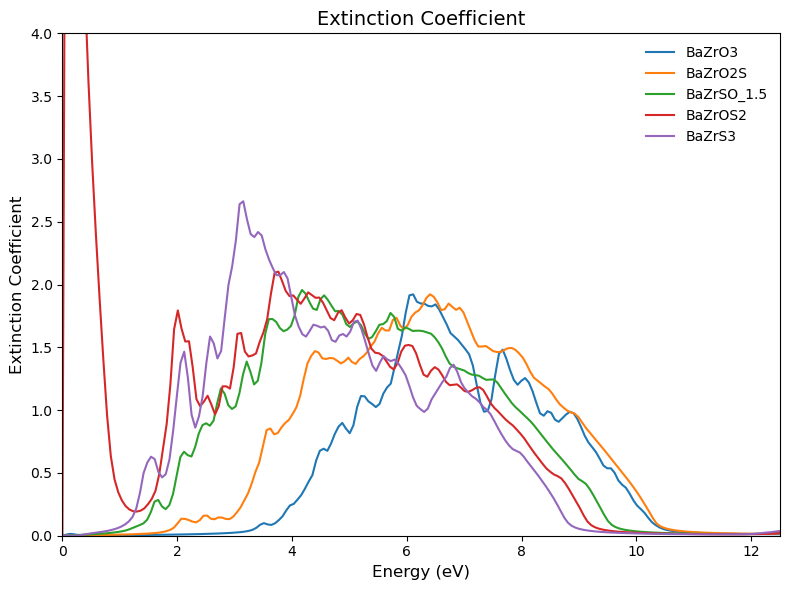

Saved plot for Extinction Coefficient to ./curve/extinction_coefficient.png


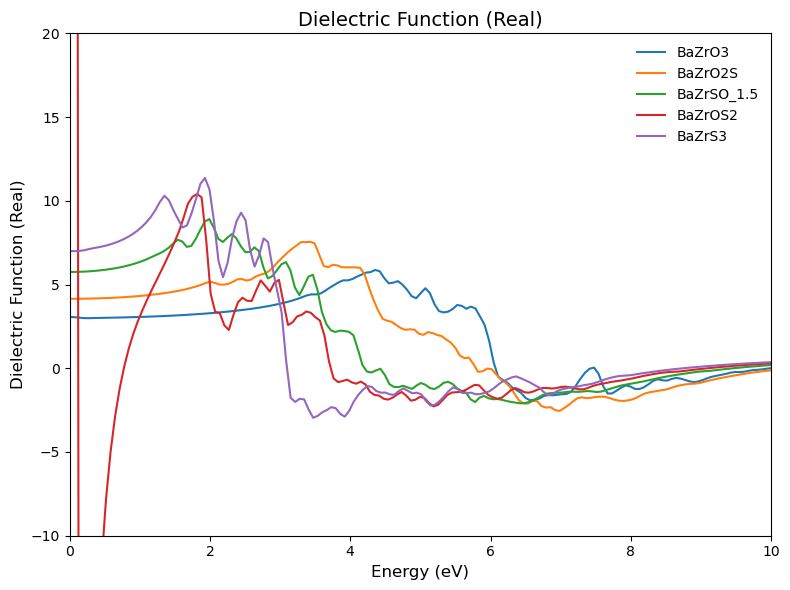

Saved plot for Dielectric Function (Real) to ./curve/dielectric_function_(real).png


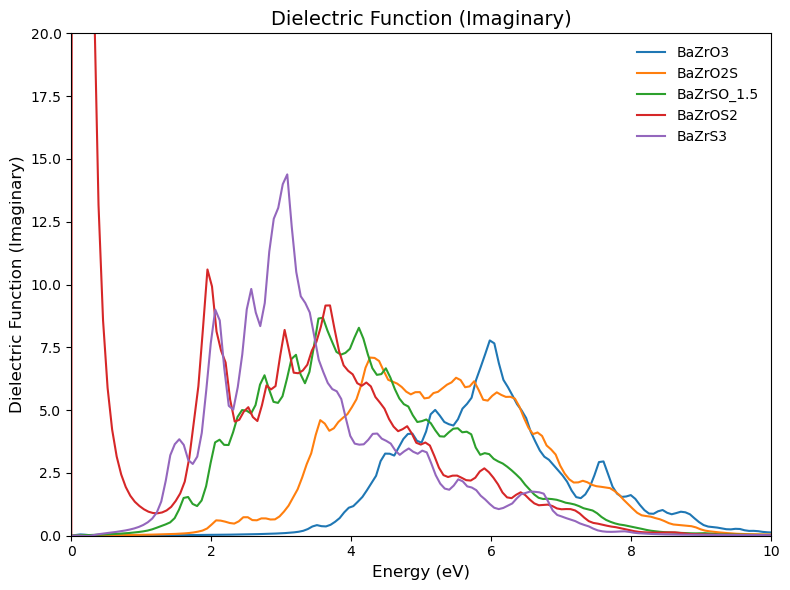

Saved plot for Dielectric Function (Imaginary) to ./curve/dielectric_function_(imaginary).png


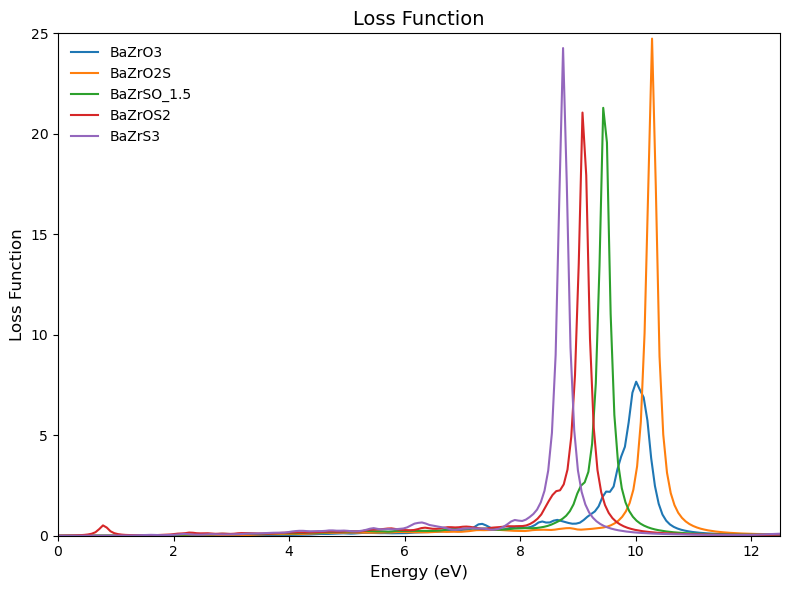

Saved plot for Loss Function to ./curve/loss_function.png
All optical curves plotted and saved.


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define compounds and directory paths
compounds = ['BaZrO3', 'BaZrO2S', 'BaZrSO_1.5', 'BaZrOS2', 'BaZrS3']  # Replace with actual names
base_dir = './'  # Base directory containing compound subdirectories
optical_subdir = 'optical/'  # Subdirectory within each compound's folder for optical data

# Define file names for the 7 optical properties
optical_files = [
    'ABSORPTION.dat',
    'REFLECTIVITY.dat',
    'REFRACTIVE.dat',
    'EXTINCTION.dat',
    'REAL.in',
    'IMAG.in',
    'ENERGY_LOSS_SPECTRUM.dat',
]

# Property names and ranges corresponding to each file
properties = [
    {
        "name": "Absorption Coefficient",
        "x_range": (0, 19),  # Energy (eV)
        "y_range": (0, 1.3e6),  # Absorption Coefficient (example values)
    },
    {
        "name": "Reflectivity",
        "x_range": (0, 12.5),
        "y_range": (0, 1),
    },
    {
        "name": "Refractive Index",
        "x_range": (0, 12.5),
        "y_range": (0, 4),
    },
    {
        "name": "Extinction Coefficient",
        "x_range": (0, 12.5),
        "y_range": (0, 4),
    },
    {
        "name": "Dielectric Function (Real)",
        "x_range": (0, 10),
        "y_range": (-10, 20),
    },
    {
        "name": "Dielectric Function (Imaginary)",
        "x_range": (0, 10),
        "y_range": (0, 20),
    },
    {
        "name": "Loss Function",
        "x_range": (0, 12.5),
        "y_range": (0, 25),
    },
]

# Initialize plot directory
output_dir = './curve/'
os.makedirs(output_dir, exist_ok=True)

# Loop over optical properties and plot data for all compounds
for file_name, prop in zip(optical_files, properties):
    plt.figure(figsize=(8, 6))
    property_name = prop["name"]
    x_range = prop["x_range"]
    y_range = prop["y_range"]

    for compound in compounds:
        # Define the path to the data file for the current compound
        dir_path_opt = os.path.join(base_dir, compound, optical_subdir)
        file_path = os.path.join(dir_path_opt, file_name)

        # Check if file exists
        if not os.path.exists(file_path):
            print(f"Warning: {file_path} not found for {compound}.")
            continue

        # Load data
        try:
            data = np.loadtxt(file_path)
            x = data[:, 0]  # Energy (eV) or Wavelength (nm)
            y = data[:, 1]  # Optical property value

            # Plot data for this compound
            plt.plot(x, y, label=compound, linewidth=1.5)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            continue

    # Customize the plot
    plt.title(property_name, fontsize=14)
    plt.xlabel('Energy (eV)', fontsize=12)  # Change to 'Wavelength (nm)' if applicable
    plt.ylabel(property_name, fontsize=12)
    plt.xlim(x_range)
    plt.ylim(y_range)
    #plt.grid(True)
    plt.legend(fontsize=10, loc='best', frameon=False)

    # Save the plot
    output_file = os.path.join(output_dir, f"{property_name.replace(' ', '_').lower()}.png")
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.show()

    print(f"Saved plot for {property_name} to {output_file}")

print("All optical curves plotted and saved.")
